# Projet de Reconnaissance Faciale avec LBP, CNN, PCA et MLP

### Objectif
Développer un système de reconnaissance faciale optimisé sur la base FEI en combinant:

1. Extraction de caractéristiques avec LBP (Local Binary Patterns) et CNN

2. Réduction de dimension avec PCA

3. Classification avec un MLP (Multi-Layer Perceptron)

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
import glob
from sklearn.model_selection import train_test_split

# 🔄 Nouveau chargement des images à partir d’un seul dossier
def load_flat_images_from_folder(folder_path, image_size=(64, 64)):
    image_paths = sorted(glob.glob(os.path.join(folder_path, '*.jpg')))
    X, y = [], []

    for path in image_paths:
        filename = os.path.basename(path)
        person_id = filename.split('-')[0]  # extrait le "1" de "1-01.jpg"
        img = cv2.imread(path)
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img_resized = cv2.resize(img_gray, image_size)
        X.append(img_resized)
        y.append(person_id)

    return np.array(X), np.array(y)

### Kaggle

In [3]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [4]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [5]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

### ME

In [6]:
# Extraction des caractéristiques avec LBP
def extract_lbp_features(images, P=8, R=1):
    lbp_features = []
    for img in images:
        lbp = local_binary_pattern(img, P, R, method='uniform')
        hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, P + 3), density=True)
        lbp_features.append(hist)
    return np.array(lbp_features)

In [7]:
# Réduction de dimension avec PCA
def apply_pca(features, n_components=10):
    pca = PCA(n_components=n_components)
    reduced_features = pca.fit_transform(features)
    return reduced_features, pca

In [8]:
# Classification avec MLP
def train_mlp_classifier(X_train, y_train):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
    mlp.fit(X_train_scaled, y_train)
    return mlp, scaler

In [9]:
# Évaluation du modèle
def evaluate_model(model, scaler, X_test, y_test):
    X_test_scaled = scaler.transform(X_test)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.2f}")

In [10]:
# Étape 2: Extraction des caractéristiques LBP
lbp_features = extract_lbp_features(images)

NameError: name 'images' is not defined

In [ ]:
# Étape 3: Réduction de dimension avec PCA
X_reduced, pca = apply_pca(X_lbp)

In [ ]:
# Étape 4: Division des données
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(2240, 10)

In [ ]:
# Étape 5: Entraînement du MLP
mlp_model, scaler = train_mlp_classifier(X_train, y_train)

C:\Users\abidi\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
# Étape 6: Évaluation du modèle
evaluate_model(mlp_model, scaler, X_test, y_test)

Accuracy: 0.09


# Second shot

## 📂 Étape 1 : Chargement et Prétraitement des Images

In [11]:
import glob
from sklearn.model_selection import train_test_split

# 🔄 Nouveau chargement des images à partir d’un seul dossier
def load_flat_images_from_folder(folder_path, image_size=(64, 64)):
    image_paths = sorted(glob.glob(os.path.join(folder_path, '*.jpg')))
    X, y = [], []

    for path in image_paths:
        filename = os.path.basename(path)
        person_id = filename.split('-')[0]  # extrait le "1" de "1-01.jpg"
        img = cv2.imread(path)
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img_resized = cv2.resize(img_gray, image_size)
        X.append(img_resized)
        y.append(person_id)

    return np.array(X), np.array(y)

In [12]:
# 📥 Charger les images
X, y = load_flat_images_from_folder("C:/Users/abidi/Documents/FSEGT/Semestre 2/Python/Projet/originalimages")

## 🧱 Étape 2 : Extraction de caractéristiques avec LBP

In [ ]:
from skimage.feature import local_binary_pattern

def extract_lbp_features(images, P=8, R=1):
    features = []
    for img in images:
        lbp = local_binary_pattern(img, P, R, method='uniform')
        hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, P + 3), range=(0, P + 2), density=True)
        features.append(hist)
    return np.array(features)

#### ➡️ Cette version donne beaucoup plus de features (typiquement 500+), ce qui est parfait pour PCA + MLP !

In [ ]:
def extract_lbp_features(images, radius=1, n_points=8, grid_x=8, grid_y=8):
    features = []
    for image in images:
        h, w = image.shape
        cell_h, cell_w = h // grid_y, w // grid_x
        hist_features = []

        for i in range(grid_y):
            for j in range(grid_x):
                y0, y1 = i * cell_h, (i + 1) * cell_h
                x0, x1 = j * cell_w, (j + 1) * cell_w
                cell = image[y0:y1, x0:x1]
                lbp = local_binary_pattern(cell, n_points, radius, method="uniform")
                hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))
                hist_features.extend(hist)

        features.append(hist_features)
    return np.array(features)

In [ ]:
# 🔎 Extraire les caractéristiques LBP
X_lbp = extract_lbp_features(X)

In [ ]:
X_lbp.shape

(2800, 10)

## 🧠 Étape 3 : Réduction de dimension avec PCA

In [ ]:
from sklearn.decomposition import PCA

# def reduce_with_pca(features, n_components=100):
#     pca = PCA(n_components=n_components)
#     reduced = pca.fit_transform(features)
#     return reduced, pca

def reduce_with_pca(features, n_components=100):
    max_components = min(features.shape[0], features.shape[1])
    n_components = min(n_components, max_components)
    pca = PCA(n_components=n_components)
    reduced = pca.fit_transform(features)
    print(n_components)
    return reduced, pca


In [ ]:
# 🎯 Encoder les classes
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

In [ ]:
encoder

LabelEncoder()

In [ ]:
y_encoded

array([  0,   0,   0, ..., 199, 199, 199], dtype=int64)

In [ ]:
y_categorical.shape

(2800, 200)

In [ ]:
# 🔽 Réduction de dimension avec PCA
X_pca, pca = reduce_with_pca(X_lbp, n_components=100)

10


In [ ]:
X_pca.shape

(2800, 10)

In [ ]:
pca.components_.shape

(10, 10)

In [ ]:
# 🔀 Séparer en train/test
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y_categorical, test_size=0.2, stratify=y_categorical, random_state=42)

# 🔍 Étape 4 : Création et entraînement du MLP

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

def build_mlp(input_dim, num_classes):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=input_dim))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

## 🧪 Étape 5 : Entraînement complet et évaluation

In [ ]:
# 🧠 Créer et entraîner le modèle MLP
model = build_mlp(input_dim=X_pca.shape[1], num_classes=y_categorical.shape[1])
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

C:\Users\abidi\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.0013 - loss: 5.2990 - val_accuracy: 0.0022 - val_loss: 5.3015
Epoch 2/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0071 - loss: 5.2953 - val_accuracy: 0.0000e+00 - val_loss: 5.3044
Epoch 3/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0074 - loss: 5.2898 - val_accuracy: 0.0045 - val_loss: 5.3085
Epoch 4/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0100 - loss: 5.2668 - val_accuracy: 0.0067 - val_loss: 5.3026
Epoch 5/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0148 - loss: 5.2131 - val_accuracy: 0.0022 - val_loss: 5.2757
Epoch 6/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0165 - loss: 5.1295 - val_accuracy: 0.0022 - val_loss: 5.2584
Epoch 7/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0158 - loss: 5.0375 - val_accuracy: 0.0045 - val_loss: 5.2195
Epoch 8/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0192 - loss: 4.9618 - val_accuracy: 0.0022 - val_

In [ ]:
# 📈 Évaluation finale
loss, acc = model.evaluate(X_test, y_test)
print(f"✅ Accuracy finale sur le test set : {acc * 100:.2f}%")

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0413 - loss: 4.4995
✅ Accuracy finale sur le test set : 4.82%


## 📉 Étape 6 : Matrice de confusion

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


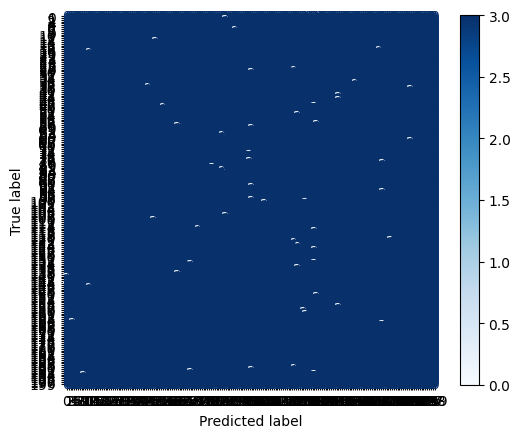

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()